In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("./tmdb_5000_movies.csv")

In [3]:
        # Reading files
        df1 = pd.read_csv("./tmdb_5000_credits.csv")
        df2 = pd.read_csv("./tmdb_5000_movies.csv")
           # Defining column names for our credits data frame
        df1.columns = ["id", "tittle", "cast", "crew"]
   
        # merging both data frames together
        df2 = df2.merge(df1, on="id")


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
df2.describe()


,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
# Number of movies vs the release year

df2.fillna(0)
df2.drop_duplicates(inplace = True)
reader=df2
reader['release_date'] = pd.to_datetime(reader['release_date'])
reader['release_date'].head()

0   2009-12-10
1   2007-05-19
2   2015-10-26
3   2012-07-16
4   2012-03-07
Name: release_date, dtype: datetime64[ns]

release_date
2016-09-02    1
2016-09-09    2
2016-09-16    1
2016-10-02    1
2017-02-03    1
Name: id, dtype: int64


Text(0, 0.5, 'Number Of Movies')

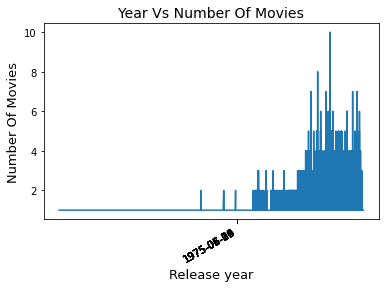

In [7]:
# make group for each year and count the number of movies in each year 
data=reader.groupby('release_date').count()['id']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
reader.groupby('release_date').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
#sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
#sns.set_style("whitegrid")

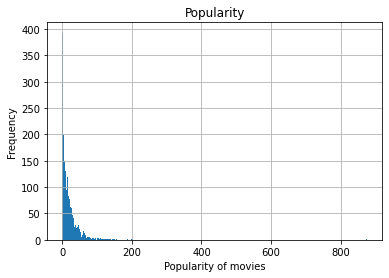

In [8]:
# Popularity vs Frequency

df1=df2
plt.hist(df1['popularity'],1000) #Makes a histogram with 1000 buckets using all data in the "popularity" collumn

plt.xlabel('Popularity of movies') #Sets x axis label to Fare price (Dollars)
plt.ylabel('Frequency') #Sets y axis label to Frequency
plt.title("Popularity") #Sets title to "Histogram of Fares on Titanic"
plt.grid(True) #Enables Grid Lines

plt.show() #Creates histogram graphic

In [9]:
#calculate Profit for each of the movie
#add a new column in the dataframe name 'Profit'
reader['Profit'] = reader['revenue'] - reader['budget']
#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = reader[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = reader[x].idxmax()
    high = pd.DataFrame(reader.loc[high_index,:])
    low = pd.DataFrame(reader.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",reader['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",reader['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Lone Ranger


,0,13
budget,237000000,255000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/the-lone-ranger/
id,19995,57201
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 1556, ""name"": ""texas""}, {""id"": 2673, ""..."
original_language,en,en
original_title,Avatar,The Lone Ranger
overview,"In the 22nd century, a paraplegic Marine is di...",The Texas Rangers chase down a gang of outlaws...
popularity,150.437577,49.046956
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."


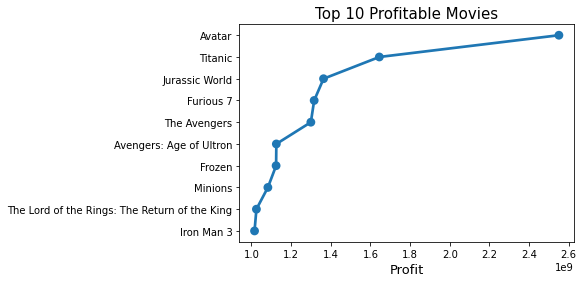

In [10]:
import seaborn as sns
#make a plot which contain top 10 movies which earn highest profit.
#sort the 'Profit' column in decending order and store it in the new dataframe,
info = pd.DataFrame(reader['Profit'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

Text(0.5, 1.0, 'Popular Movies')

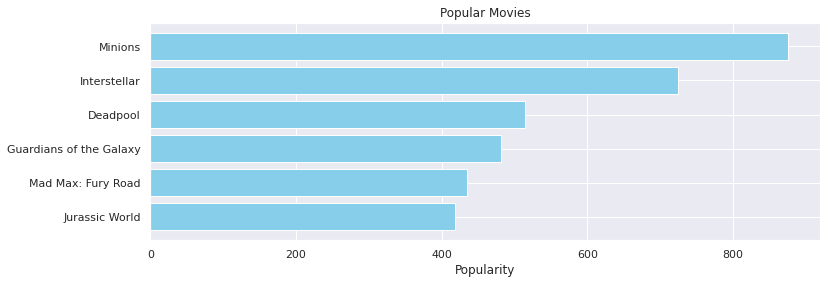

In [11]:
pop= df1.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Movie Which Has Highest runtime :  Carlos
Movie Which Has Lowest runtime  :  Vessel


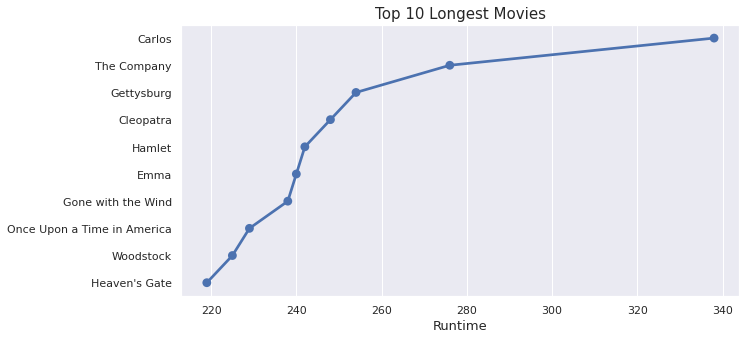

In [12]:
#find the movie with longest and shortest runtime.
#use 'find_minmax' function which i made earlier by passsing 'runtime' as argument.
#it can't be possible a movie with zero runtime,but dataset contain some data like this.
#so update zero with NAN in runtime column.
reader['runtime'] = reader['runtime'].replace(0,np.NAN)
find_minmax('runtime')

#top 10 Movies With Longest runtime
#sort the 'runtime' column in decending order and store it in the new dataframe.
info = pd.DataFrame(reader['runtime'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 longest duraton movies data from the list and dataframe.
x = list(data[:10])
y = list(info['runtime'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")

Movie Which Has Highest vote_average :  Stiff Upper Lips
Movie Which Has Lowest vote_average  :  Black Water Transit


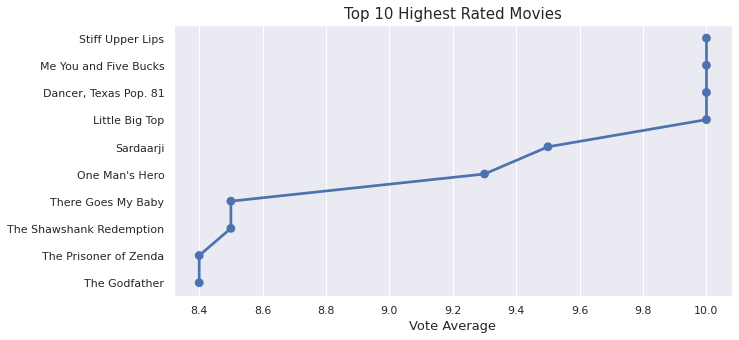

In [13]:
#find the movie with most and least votes.
#use 'find_minmax' function which i made earlier by passsing 'Vote_average' as argument.
find_minmax('vote_average')

#top 10 highets rated movies.
#sort the 'vote_average' column in decending order and store it in the new dataframe.
info = pd.DataFrame(reader['vote_average'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))

##extract the top 10 highly rated movies data from the list and dataframe.
x = list(data[:10])
y = list(info['vote_average'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")


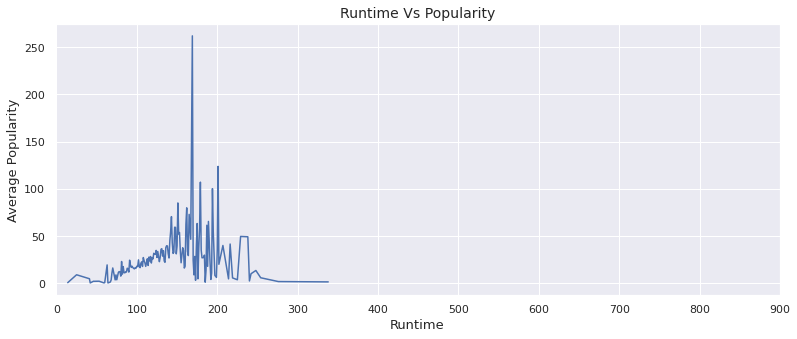

In [14]:
#use groupby function and group the data according to their runtime.
#make a plot using their popularity and find which length movies are most popular.

#make the group of the data according to their runtime and find the mean popularity related to this and plot.
reader.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")